In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [6]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [7]:
X=data[['sepal.length','sepal.width','petal.length','petal.width']]
y=data[['variety']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn= KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [13]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
print('Accuracy:',knn.score(X_train,y_train)*100)

Accuracy: 97.14285714285714


In [15]:
print('Accuracy:',knn.score(X_test,y_test)*100)

Accuracy: 100.0


In [16]:
from sklearn import metrics

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
knn_cv=KNeighborsClassifier()

In [19]:
k_range=list(range(1,10))
param_grid=dict(n_neighbors=k_range)

In [44]:
grid=GridSearchCV(knn_cv, param_grid, cv=15, scoring='accuracy')

In [45]:
grid_search=grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [46]:
print(grid_search.best_params_)

{'n_neighbors': 5}


In [47]:
accuracy=grid_search.best_score_*100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Accuracy for our training dataset with tuning is : 95.24%


In [48]:
print('Accuracy:',grid_search.score(X_test,y_test)*100)

Accuracy: 100.0


In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
Y_pred=grid_search.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      1.00      1.00        20
   Virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
cm=confusion_matrix(y_test,Y_pred,labels=grid_search.classes_)

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

In [54]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=grid_search.classes_)

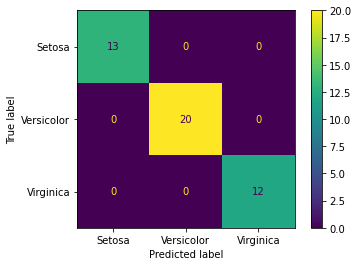

In [55]:
disp.plot()

plt.show()